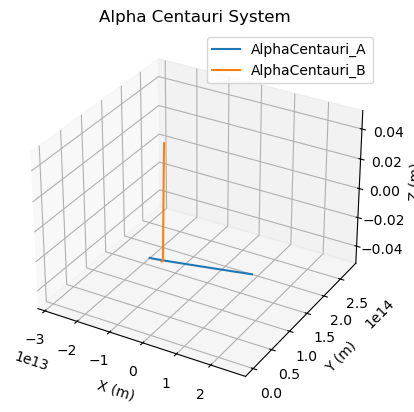

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

class CorpsCeleste:
    def __init__(self, name, mass, position, velocity):
        self.name = name
        self.mass = mass
        '''self.position = position
        self.velocity = velocity'''
        self.position = np.array(position, dtype = float)
        self.positions = [self.position.copy()]
        # self.position = [float(position[0], float(position[1]), float(position[2]))]
        self.velocity = np.array(velocity, dtype=float) 

    def update_position (self, dt):
        self.position += self.velocity*dt
        self.positions.append(self.position.copy())

        # dt = temps écoulé, new position = old position + velocity*time
        # self.positions.append(self.position.copy())
        # copie pour après
    
    def apply_force(self, force, dt):
        acceleration = force/self.mass
        self.velocity += acceleration * dt
        # v nouveau = v ancien + a * temps


class KeplerSystem:
    def __init__(self, G = 6.673430e-11):
        self.bodies = []
        # liste qui va contenir tous mes objets célestes du syst, chaque objet de mon syst aura sa propre liste bodies
        self.G = G

    def add_body(self, body) :
        self.bodies.append(body)
        # ajouter le corps 'body'ds la liste propre à ce syst
        pass

    def compute_gravitational_force(self, b1, b2):
        r = b2.position - b1.position
        # vectur qui va de corps1 à cprps2 = direction + distance relative entre les 2
        # r = r2-r1 = (x2-x1, y2-y1, z2-z1)
        distance = math.sqrt(
            (b2.position[0] - b1.position[0])**2 +
            (b2.position[1] - b1.position[1])**2 +
            (b2.position[2] - b1.position[2])**2
            # b2.position[0] = x de b2 -- en gros racine de (x2-x1)^2+(y2-y1)^2...
        )

        force_magnitude = self.G * b1.mass * b2.mass / distance**2 
        # F= G m1m2/d^2
        force_direction = r/distance
        # divise chaque composante du vecteurr r par distance pour créer vecteur unitaire valeur 1 mais même direction que r
        return force_magnitude*force_direction
        # multiplie par vectur unitaire

    
    def update(self, dt):
        forces = [np.zeros(3) for _ in self.bodies]
        # crée vecteur (array) [0,0,0] en 3D (x,y,z)

        # calcul forces gravitationnelles entre chq paires de corps
        # On a une liste self.bodies avec plusieurs corps (planètes, étoiles…). 
        # Pour chaque corps b1 (avec son numéro i), On regarde chaque autre corps b2 (avec son numéro j),
        # puis calcule la force que b2 exerce sur b1.
        # On ajoute cette force à la force totale que subit b1.

        i = 0
        for b1 in self.bodies: #pour chq corps b1
            j = 0
            for b2 in self.bodies: #pour chq corps b2
                if i != j:
                    forces[i] += self.compute_gravitational_force(b1, b2)
                j += 1
            i += 1
        
        i = 0
        for body in self.bodies:
            body.apply_force(forces[i], dt)
            body.update_position(dt)
            i += 1



'''------------------------------- Application with real bodies----------------------------------'''


G = 6.67430e-11
M_sun = 1.989e30
M_earth = 5.972e24
AU = 1.496e11
system = KeplerSystem(G)


AlphaCentauri_A = CorpsCeleste("AlphaCentauri_A", 1.1*M_sun, [0,0,0], [0,0,0])
AlphaCentauri_B = CorpsCeleste("AlphaCentauri_B", 0.9*M_sun, [23.6*AU, 0, 0], [0,20000,0])

proxima = CorpsCeleste('Proxima Centauri', 0.122*M_sun, [-13000*AU, 0, 0], [0, 20000, 0])  # 20 km/s
# proxima_b = CorpsCeleste('Proxima b', 1.27 * M_earth, [-13000 * AU + 0.0485 * AU, 0, 0], [0, 47000, 0])  # 47 km/s


system.add_body(AlphaCentauri_A)
system.add_body(AlphaCentauri_B)
'''system.add_body(proxima)
system.add_body(proxima_b)'''


# Simulation
dt = 60 * 60 * 24  # 1 day
steps = 365 * 500    # 5 years



for _ in range(steps):
    system.update(dt)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for body in system.bodies:
    pos = np.array(body.positions)
    ax.plot(pos[:, 0], pos[:, 1], pos[:, 2], label=body.name)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Alpha Centauri System')
ax.legend()
plt.show()



    
    
